Following this [tutorial](https://www.guru99.com/stemming-lemmatization-python-nltk.html)

# Setup

Natural Language Processing (NLP) is a branch of AI that helps computers to understand, interpret and manipulate human languages like English or Hindi to analyze and derive it’s meaning. NLP helps developers to organize and structure knowledge to perform tasks like translation, summarization, named entity recognition, relationship extraction, speech recognition, topic segmentation, etc.

The state of the art NLP library for python is NLTK (**N**atural **L**anguage **T**ool**K**it)

In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

Testing the download

In [2]:
from nltk.corpus import brown
brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

# Tokenization

Tokenization is the process by which a large quantity of text is **divided into smaller parts** called tokens. These tokens are very useful for **finding patterns** and are considered as a base step for stemming and lemmatization. Two kinds 
* word tokenize
* sentence tokenize

In [4]:
from nltk.tokenize import word_tokenize
text = "God is Great! I won a lottery."
print(word_tokenize(text))

['God', 'is', 'Great', '!', 'I', 'won', 'a', 'lottery', '.']


In [5]:
from nltk.tokenize import sent_tokenize
text = "God is Great! I won a lottery."
print(sent_tokenize(text))

['God is Great!', 'I won a lottery.']


In [6]:
# 

# POS tagging

POS Tagging (Parts of Speech Tagging) is a process to **mark** up the words in text format for a particular part of a speech based on its **definition and context**. It is responsible for text reading in a language and assigning some specific token (Parts of Speech) to each word. It is also called **grammatical** tagging.

In [8]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

Chunking in NLP is a process to take small pieces of information and **group** them into large units. The primary use of Chunking is making groups of *noun phrases*. It is used to add **structure to the sentence** by following POS tagging combined with regular expressions. The resulted group of words are called *chunks*. It is also called shallow parsing.

In [10]:
text = "learn php from guru99"
tokens = nltk.word_tokenize(text)
print(tokens)
tag = nltk.pos_tag(tokens)
print(tag)
grammar = "NP: {<DT>?<JJ>*<NN>}"
cp = nltk.RegexpParser(grammar)
result = cp.parse(tag)
print(result)
# It will draw the pattern graphically which can be seen in Noun Phrase chunking
result.draw()

['learn', 'php', 'from', 'guru99']
[('learn', 'JJ'), ('php', 'NN'), ('from', 'IN'), ('guru99', 'NN')]
(S (NP learn/JJ php/NN) from/IN (NP guru99/NN))


## Counting POS tags

1. To count the tags, you can use the package Counter from the collection’s module. A counter is a dictionary subclass which works on the principle of key-value operation. It is an unordered collection where elements are stored as a dictionary key while the count is their value.
2. Write the text whose pos_tag you want to count.
3. Some words are in upper case and some in lower case, so it is appropriate to transform all the words in the lower case before applying tokenization.
4. Pass the words through word_tokenize from nltk.
5. Calculate the pos_tag of each token 
6. Feed the tags to the Counter class

In [14]:
from collections import Counter
text = "Guru99 is one of the best sites to learn WEB, SAP, Ethical Hacking and much more online."
lower_case = text.lower()
tokens = nltk.word_tokenize(lower_case)
tags = nltk.pos_tag(tokens)
print("Tagging the words:")
print(tags)
counts = Counter(tag for word,  tag in tags)
print("Tag counting:")
print(counts)


Tagging the words:
[('guru99', 'NN'), ('is', 'VBZ'), ('one', 'CD'), ('of', 'IN'), ('the', 'DT'), ('best', 'JJS'), ('sites', 'NNS'), ('to', 'TO'), ('learn', 'VB'), ('web', 'NN'), (',', ','), ('sap', 'NN'), (',', ','), ('ethical', 'JJ'), ('hacking', 'NN'), ('and', 'CC'), ('much', 'RB'), ('more', 'JJR'), ('online', 'NN'), ('.', '.')]
Tag counting:
Counter({'NN': 5, ',': 2, 'VBZ': 1, 'CD': 1, 'IN': 1, 'DT': 1, 'JJS': 1, 'NNS': 1, 'TO': 1, 'VB': 1, 'JJ': 1, 'CC': 1, 'RB': 1, 'JJR': 1, '.': 1})


## Frequency distributions

Frequency Distribution is referred to as the number of times an outcome of an experiment occurs. It is used to find the frequency of each word occurring in a document. It uses **FreqDistclass** and defined by the **nltk.probabilty** module. It plays a significant role in finding the **keywords** in the text

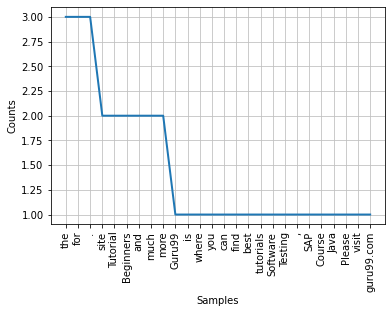

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [17]:
a = "Guru99 is the site where you can find the best tutorials for Software Testing     Tutorial, SAP Course for Beginners. Java Tutorial for Beginners and much more. Please     visit the site guru99.com and much more."
words = nltk.tokenize.word_tokenize(a)
fd = nltk.FreqDist(words)
fd.plot()


## Collocation (Bigrams and Trigrams)

Collocations are the pairs of words occurring together many times in a document. It is calculated by the number of those **pair occurring together** to the overall word count of the document. EXAMPLE Consider electromagnetic spectrum with words like ultraviolet rays, infrared rays. The words ultraviolet and rays are not used individually and hence can be treated as Collocation.

In [18]:
text = "Guru99 is a totally new kind of learning experience."
tokens = nltk.word_tokenize(text)
output = list(nltk.bigrams(tokens))
print(output)

[('Guru99', 'is'), ('is', 'a'), ('a', 'totally'), ('totally', 'new'), ('new', 'kind'), ('kind', 'of'), ('of', 'learning'), ('learning', 'experience'), ('experience', '.')]


In [19]:
text = "Guru99 is a totally new kind of learning experience."
tokens = nltk.word_tokenize(text)
output = list(nltk.trigrams(tokens))
print(output)

[('Guru99', 'is', 'a'), ('is', 'a', 'totally'), ('a', 'totally', 'new'), ('totally', 'new', 'kind'), ('new', 'kind', 'of'), ('kind', 'of', 'learning'), ('of', 'learning', 'experience'), ('learning', 'experience', '.')]


In [21]:
text = "Hello Guru99, You have to build a very good site, and I love visiting your site."
sentence = nltk.sent_tokenize(text)
for sent in sentence:
    print(nltk.pos_tag(nltk.word_tokenize(sent)))

[('Hello', 'NNP'), ('Guru99', 'NNP'), (',', ','), ('You', 'PRP'), ('have', 'VBP'), ('to', 'TO'), ('build', 'VB'), ('a', 'DT'), ('very', 'RB'), ('good', 'JJ'), ('site', 'NN'), (',', ','), ('and', 'CC'), ('I', 'PRP'), ('love', 'VBP'), ('visiting', 'VBG'), ('your', 'PRP$'), ('site', 'NN'), ('.', '.')]


Two types of POS taggers:
1. Rule-Based
2. Stochastic POS Taggers

Rule-Based POS Tagger: For the words having ambiguous meaning, rule-based approach on the basis of contextual information is applied. It is done so by checking or analyzing the meaning of the preceding or the following word. 

Stochastic POS Tagger: Different approaches such as frequency or probability are applied under this method. If a word is mostly tagged with a particular tag in training set then in the test sentence it is given that particular tag. The word tag is dependent not only on its own tag but also on the previous tag. 

# Stemming and Lemmatization

Stemming and Lemmatization are text normalization techniques for Natural Language Processing. These techniques are widely used for text preprocessing. The difference between stemming and lemmatization is that **stemming is faster** as it cuts words **without knowing the context**, while **lemmatization** is slower as it knows the **context** of words before processing.

**Stemming** is a technique in which a set of words in a sentence are converted into a sequence to shorten its lookup. The English language has many *variations* of a single word. These variations create *ambiguity* in machine learning training and prediction. To create a successful model, it’s vital to filter such words and **convert to the same type of sequenced data** using stemming. Also, this is an important technique to get row data from a set of sentence and removal of redundant data also known as normalization. 

In [23]:
from nltk.stem import PorterStemmer
e_words = ["wait", "waiting", "waited", "waits"]
ps = PorterStemmer()
for w in e_words:
    rootWord = ps.stem(w)
    print(rootWord)

wait
wait
wait
wait


In [24]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
sentence = "Hello Guru99, You have to build a very good site and I love visiting your site."
words = word_tokenize(sentence)
ps = PorterStemmer()
for w in words:
	rootWord = ps.stem(w)
	print(rootWord)


hello
guru99
,
you
have
to
build
a
veri
good
site
and
i
love
visit
your
site
.


**Lemmatization** is the algorithmic process of *finding the lemma* of a word depending on its meaning and *context*. Lemmatization usually refers to the morphological analysis of words, which aims to *remove inflectional endings*. It helps in returning the base or dictionary form of a word known as the lemma.

In [25]:
from nltk.stem.porter import PorterStemmer
text = "studies studying cries cry"
words = nltk.word_tokenize(text)
ps = PorterStemmer()
for w in words:
    print(f"Stemming for {w} is {ps.stem(w)}")


Stemming for studies is studi
Stemming for studying is studi
Stemming for cries is cri
Stemming for cry is cri


In [26]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
text = "studies studying cries cry"
words = nltk.word_tokenize(text)
for w in words:
	print(f"Lemma for {w} is {wnl.lemmatize(w)}")


Lemma for studies is study
Lemma for studying is studying
Lemma for cries is cry
Lemma for cry is cry


Lemmatizer minimizes text **ambiguity**. Example words like bicycle or bicycles are converted to base word bicycle. Basically, it will *convert all words having the same meaning* but different representation to their base form. It *reduces the word density* in the given text and helps in preparing the accurate features for training machine.

In [27]:
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from collections import defaultdict

#Dictionary is created where pos_tag (first letter) are the key values whose values are mapped with the value from wordnet dictionary. We have taken the only first letter as we will use it later in the loop.

tag_map = defaultdict(lambda: wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

text = "guru99 is a totally new kind of learning experience."
tokens = word_tokenize(text)
lemma_function = WordNetLemmatizer()
for token, tag in pos_tag(tokens):
	lemma = lemma_function.lemmatize(token, tag_map[tag[0]])
	print(token, "=>", lemma)


guru99 => guru99
is => be
a => a
totally => totally
new => new
kind => kind
of => of
learning => learn
experience => experience
. => .


# Wordnet

Wordnet is an NLTK corpus reader, a lexical database for English. It can be used to find the meaning of words, synonym or antonym

In [3]:
from nltk.corpus import wordnet

In [4]:
syns = wordnet.synsets("dog")
print(syns)

[Synset('dog.n.01'), Synset('frump.n.01'), Synset('dog.n.03'), Synset('cad.n.01'), Synset('frank.n.02'), Synset('pawl.n.01'), Synset('andiron.n.01'), Synset('chase.v.01')]


In [5]:
synonyms = []
antonyms = []

for syn in wordnet.synsets("active"):
    for l in syn.lemmas():
        synonyms.append(l.name())
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())

print(set(synonyms))
print(set(antonyms))


{'participating', 'alive', 'fighting', 'active_agent', 'active_voice', 'active', 'combat-ready', 'dynamic'}
{'stative', 'quiet', 'dormant', 'extinct', 'passive', 'inactive', 'passive_voice'}


WordNet is a lexical database that has been used by a major search engine. From the WordNet, information about a given word or phrase can be calculated such as
1. synonym (words having the same meaning)
2. hypernyms (The generic term used to designate a class of specifics (i.e., meal is a breakfast), hyponyms (rice is a meal)
3. holonyms (proteins, carbohydrates are part of meal)
4. meronyms (meal is part of daily food intake)

WordNet also provides information on co-ordinate terms, derivates, senses and more. It is used to find the similarities between any two words. It also holds information on the results of the related word. In short or nutshell one can treat it as Dictionary or Thesaurus. Going deeper in wordnet, it is divided into four total subnets such as

1. Noun
2. Verb
3. Adjective
4. Adverb
 
It can be used in the area of artificial intelligence for text analysis. With the help of Wordnet, you can create your corpus for spelling checking, language translation, Spam detection and many more.

In the same way, you can use this corpus and mold it to work some dynamic functionality. This is just like ready to made corpus for you. You can use it in your way.

# Word Embedding

Word Embedding is a word representation type that allows machine learning algorithms to understand words with similar meanings. It is a language modeling and feature learning technique to map words into vectors of real numbers using neural networks, probabilistic models, or dimension reduction on the word co-occurrence matrix. Some word embedding models are Word2vec (Google), Glove (Stanford), and fastest (Facebook).

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
data_corpus = [
    "guru99 is the best sitefor online tutorials. I love to visit guru99."]
vocabulary = vectorizer.fit(data_corpus)
X = vectorizer.transform(data_corpus)
print(X.toarray())
print(vocabulary.get_feature_names_out())


[[1 2 1 1 1 1 1 1 1 1]]
['best' 'guru99' 'is' 'love' 'online' 'sitefor' 'the' 'to' 'tutorials'
 'visit']
